#1-Import du dataset depuis le drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
train="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
test="/kaggle/input/new-plant-diseases-dataset/test"
valid="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

In [4]:
train_file_name=os.listdir(train)
test_file_name=os.listdir(test)
valid_file_name=os.listdir(valid)

In [5]:
train_file_name

['Tomato___Late_blight',
 'Tomato___healthy',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Potato___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Early_blight',
 'Tomato___Septoria_leaf_spot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Strawberry___Leaf_scorch',
 'Peach___healthy',
 'Apple___Apple_scab',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Bacterial_spot',
 'Apple___Black_rot',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Peach___Bacterial_spot',
 'Apple___Cedar_apple_rust',
 'Tomato___Target_Spot',
 'Pepper,_bell___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Strawberry___healthy',
 'Apple___healthy',
 'Grape___Black_rot',
 'Potato___Early_blight',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Common_rust_',
 'Grape___Esca_(Black_Measles)',
 'Raspberry___healthy'

## preprocessing des Images d'entrainements

In [6]:
#train set
import tensorflow as tf
training_set = tf.keras.utils.image_dataset_from_directory(
    train,                           # Chemin vers le dossier racine contenant les sous-dossiers d'images pour la validation.
    labels="inferred",               # Les étiquettes (labels) sont déduites automatiquement à partir des noms des sous-dossiers.
    label_mode="categorical",        # Les labels sont encodés en vecteurs "one-hot" (catégoriel).
    class_names=None,                # Si None, les noms des classes sont déduits par ordre alphabétique à partir des sous-dossiers.
    color_mode="rgb",                # Les images sont chargées en mode couleur (3 canaux : rouge, vert, bleu).
    batch_size=32,                   # Nombre d'images par lot (batch). Ici, chaque batch contiendra 32 images.
    image_size=(128, 128),           # Redimensionnement de chaque image à la taille 128x128 pixels.
    shuffle=True,                    # Mélange les images dans le dataset pour une meilleure distribution lors de l'entraînement.
    seed=None,                       # La graine aléatoire utilisée pour le mélange; ici non spécifiée.
    validation_split=None,           # Aucun fractionnement du dataset (la totalité des images du dossier est utilisée).
    subset=None,                     # Puisque validation_split est None, il n'y a pas de sous-ensemble ("training" ou "validation") défini.
    interpolation="bilinear",        # Méthode d'interpolation utilisée lors du redimensionnement des images (ici, bilinéaire).
    follow_links=False,              # Ne pas suivre les liens symboliques dans le répertoire.
    crop_to_aspect_ratio=False       # Ne pas recadrer l'image pour conserver le rapport hauteur/largeur initial.
)

2025-05-13 05:04:44.038814: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747112684.268467      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747112684.335459      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 70295 files belonging to 38 classes.


I0000 00:00:1747112747.716990      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [7]:
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),                         # simulate feuilles prises sous différents angles
    layers.RandomRotation(0.25),                             # rotations plus marquées
    layers.RandomZoom(0.3),                                  # zooms plus forts
    layers.RandomContrast(0.3),                              # contraste plus variable
    layers.RandomBrightness(factor=0.2),                     # variations de lumière naturelle
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),  # déplacement de la feuille dans le cadre# bruit comme les capteurs de caméras
])


augmented_train = training_set.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

In [8]:
# Création du jeu de données de validation à partir d'un dossier d'images
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid,                           # Chemin vers le dossier racine contenant les sous-dossiers d'images pour la validation.
    labels="inferred",               # Les étiquettes (labels) sont déduites automatiquement à partir des noms des sous-dossiers.
    label_mode="categorical",        # Les labels sont encodés en vecteurs "one-hot" (catégoriel).
    class_names=None,                # Si None, les noms des classes sont déduits par ordre alphabétique à partir des sous-dossiers.
    color_mode="rgb",                # Les images sont chargées en mode couleur (3 canaux : rouge, vert, bleu).
    batch_size=32,                   # Nombre d'images par lot (batch). Ici, chaque batch contiendra 32 images.
    image_size=(128, 128),           # Redimensionnement de chaque image à la taille 128x128 pixels.
    shuffle=True,                    # Mélange les images dans le dataset pour une meilleure distribution lors de l'entraînement.
    seed=None,                       # La graine aléatoire utilisée pour le mélange; ici non spécifiée.
    validation_split=None,           # Aucun fractionnement du dataset (la totalité des images du dossier est utilisée).
    subset=None,                     # Puisque validation_split est None, il n'y a pas de sous-ensemble ("training" ou "validation") défini.
    interpolation="bilinear",        # Méthode d'interpolation utilisée lors du redimensionnement des images (ici, bilinéaire).
    follow_links=False,              # Ne pas suivre les liens symboliques dans le répertoire.
    crop_to_aspect_ratio=False       # Ne pas recadrer l'image pour conserver le rapport hauteur/largeur initial.
)


Found 17572 files belonging to 38 classes.


In [9]:
# Afficher les classes (noms des dossiers)
print("Classes:", training_set.class_names)

Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___

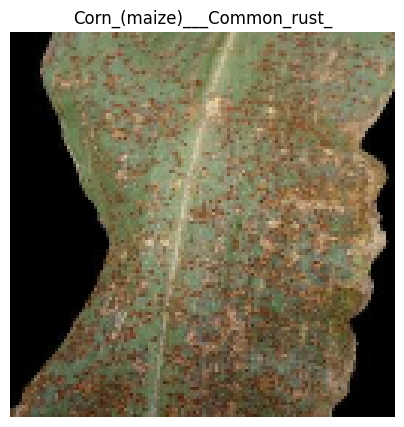

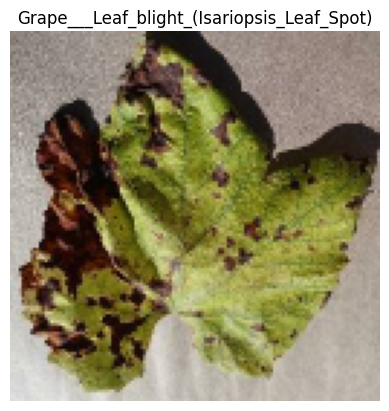

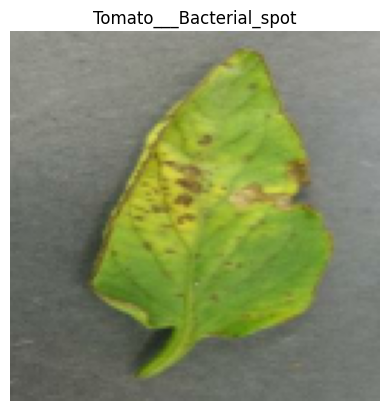

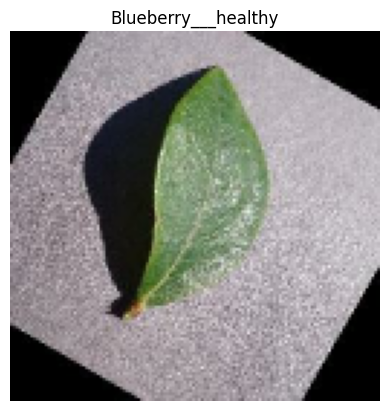

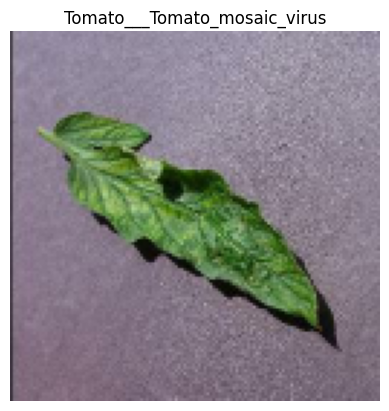

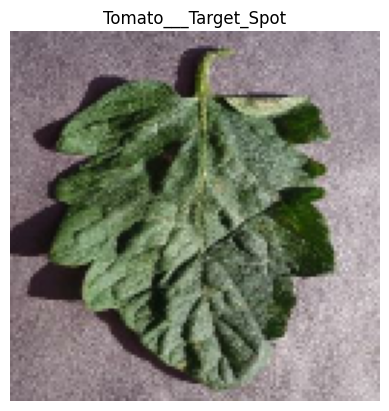

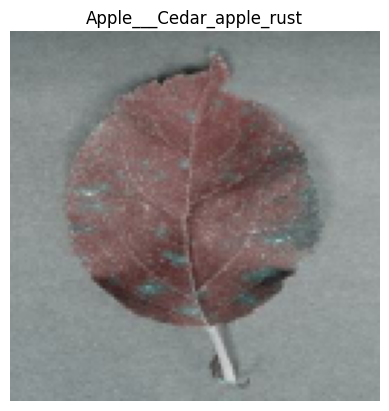

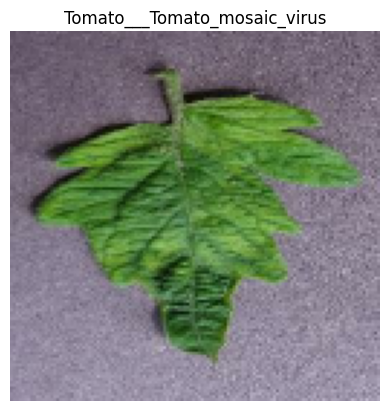

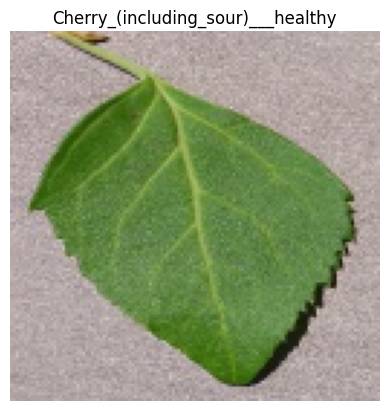

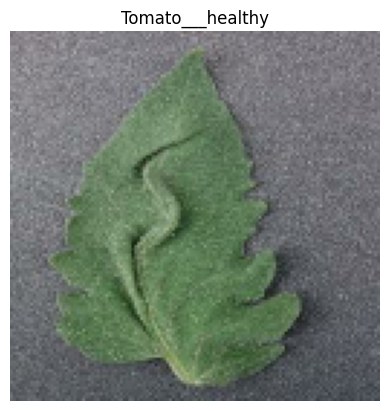

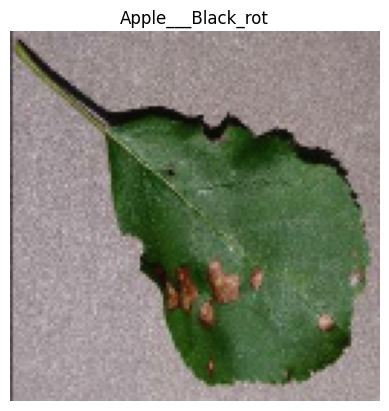

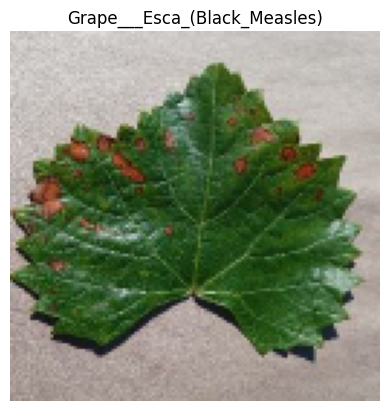

In [10]:
# Parcourir quelques batches du dataset
for images, labels in training_set.take(1):  # ici on prend un batch, à ajuster si nécessaire
    batch_size = images.shape[0]

    # Définir la taille de la figure en fonction du nombre d'images à afficher
    plt.figure(figsize=(5, 5))

    # Pour chaque image du batch, afficher l'image et le nom de la classe correspondante
    for i in range(batch_size-20):
        # Calculer l'indice de la classe à partir du vecteur one-hot
        label_index = labels[i].numpy().argmax()
        # Récupérer le nom de la classe à partir de training_set.class_names
        label_name = training_set.class_names[label_index]

        # Afficher l'image dans un subplot
        # ax = plt.subplot(6, 6, i + 1)  # Ajustez la grille selon batch_size
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(label_name)
        plt.axis("off")
        plt.show()


In [11]:
training_set.class_names[9]

'Corn_(maize)___Northern_Leaf_Blight'

# Entrainement du modele

In [12]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])
# Callbacks
# callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
#     tf.keras.callbacks.ModelCheckpoint('bestplant_model.h5', save_best_only=True)
# ]

In [14]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
training_history = cnn.fit(x=augmented_train,validation_data=validation_set,epochs=10)

Epoch 1/10


I0000 00:00:1747112761.795743      65 service.cc:148] XLA service 0x78e6a0019ed0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747112761.796616      65 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747112762.419601      65 cuda_dnn.cc:529] Loaded cuDNN version 90300


   5/2197 ━━━━━━━━━━━━━━━━━━━━ 1:10 32ms/step - accuracy: 0.0161 - loss: 4.3670

I0000 00:00:1747112769.161977      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 279s 121ms/step - accuracy: 0.2395 - loss: 2.7283 - val_accuracy: 0.6447 - val_loss: 1.2838
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 169s 77ms/step - accuracy: 0.6850 - loss: 1.0167 - val_accuracy: 0.8187 - val_loss: 0.5897
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 167s 76ms/step - accuracy: 0.8161 - loss: 0.5742 - val_accuracy: 0.7576 - val_loss: 0.9762
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 168s 76ms/step - accuracy: 0.8675 - loss: 0.4118 - val_accuracy: 0.8680 - val_loss: 0.5207
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 168s 76ms/step - accuracy: 0.8945 - loss: 0.3262 - val_accuracy: 0.8905 - val_loss: 0.3951
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 169s 77ms/step - accuracy: 0.9139 - loss: 0.2703 - val_accuracy: 0.8832 - val_loss: 0.4449
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 168s 76ms/step - accuracy: 0.9247 - loss: 0.2332 - val_accuracy: 0.9024 - val_loss: 0.3271
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 168s 76ms/step - accuracy: 0.9337 - l

In [16]:
# import joblib
# # 2. Sauvegarde du modèle
# joblib.dump(cnn, 'plantdeases.joblib')

In [17]:
# Sauvegarde du modèle
cnn.save('plantdiseases_final.h5')

# Evaluation du modele

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.9469 - loss: 0.1716
Training accuracy: 0.9491001963615417


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.9422 - loss: 0.1949
Validation accuracy: 0.94514000415802


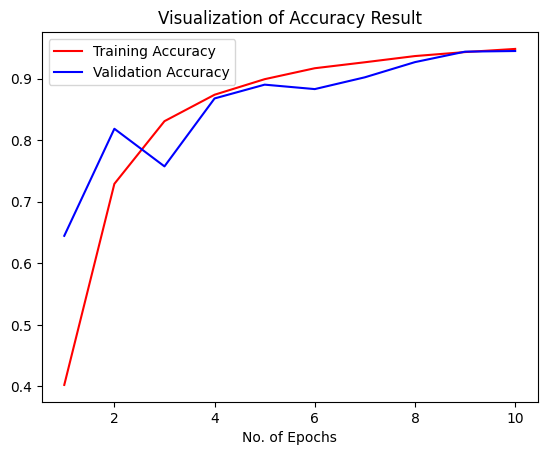

In [20]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [21]:
import tensorflow as tf

test_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [22]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step


In [23]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [24]:
# Precision Recall Fscore
class_name = validation_set.class_names
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.96      0.98       504
                                 Apple___Black_rot       0.99      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.98      0.97      0.97       440
                                   Apple___healthy       0.93      0.94      0.94       502
                               Blueberry___healthy       0.98      0.93      0.95       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.96      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.81      0.97      0.88       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.83      0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[1.56318872e-15 7.22444604e-11 4.74419580e-17 3.57295912e-14
  5.62256023e-16 5.64120502e-17 1.07628888e-11 2.46133030e-18
  2.26738736e-19 7.70284731e-18 3.55175992e-14 3.06026428e-12
  4.77398543e-14 2.29219692e-13 1.00000000e+00 1.42114023e-15
  1.35570461e-15 3.01666100e-19 2.17423117e-17 7.83230739e-13
  3.99420372e-18 1.37896117e-16 1.01827336e-15 1.84933002e-13
  1.20595101e-09 9.77614680e-15 8.44766421e-19 8.89836707e-14
  1.69200019e-11 1.98715915e-16 2.59438900e-13 1.36175125e-18
  1.98756403e-13 7.87595161e-19 5.39847409e-13 1.70501369e-15
  1.45564432e-18 5.28771223e-16]
 [9.47293373e-08 6.43516245e-08 8.93872268e-11 7.97668690e-05
  9.99896049e-01 2.54803638e-07 3.11430048e-11 4.72041260e-11
  1.98535784e-12 2.62982726e-11 1.32211175e-09 3.71533384e-15
  3.68437241e-13 2.11005716e-14 1.48377979e-12 7.88847376e-10
  6.03540412e-11 3.90096094e-10 3.45633487e-11 1.37966943e-10
  1.45309884e-11 2.62441913e-12 1.29684846e-10 1.09576714e-11
 

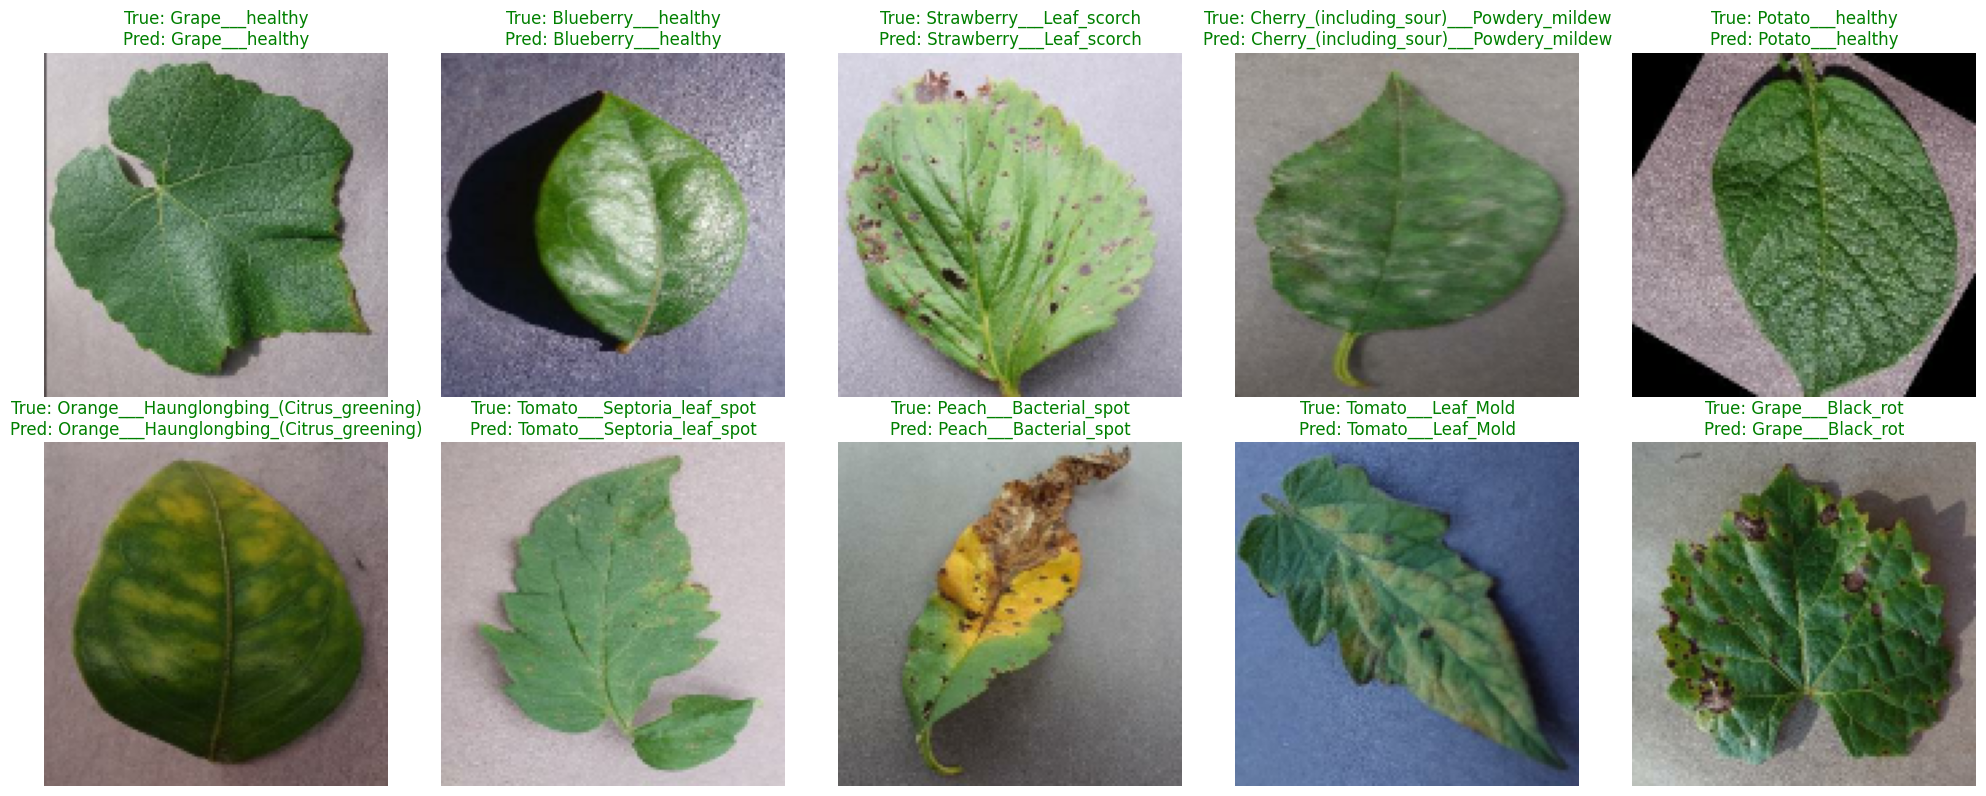

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Récupérer les 10 premiers éléments du dataset
sample_images, sample_labels = next(iter(validation_set.take(10).unbatch().batch(10)))

# Prédictions
predictions = cnn.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(sample_labels.numpy(), axis=1)
print(predictions)
# Noms des classes
class_names = validation_set.class_names 

# Affichage
plt.figure(figsize=(20, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    
    # Conversion de l'image pour matplotlib (suppression de la normalisation si nécessaire)
    img = sample_images[i].numpy().astype('uint8')
    
    plt.imshow(img)
    
    # Couleur selon l'exactitude
    color = "green" if true_classes[i] == predicted_classes[i] else "red"
    
    plt.title(f"True: {class_names[true_classes[i]]}\nPred: {class_names[predicted_classes[i]]}", 
              color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()